In [1]:
# pip install scipy

In [2]:
%load_ext autoreload
%autoreload 2
import torch
from training_utils import train_model, test
from models import BBandFChead
from torchvision.models import resnet50, ResNet50_Weights
from torch import nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/home/me.docker/.conda/envs/torch-p37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from torch.utils.data import DataLoader
from caltech101 import load_caltech101

train_dataset, test_dataset = load_caltech101(data_path="/home/me.docker/work/data")
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=1)


6941 1736


## ResNet18 runs

In [28]:
from torchvision.models import resnet18, ResNet18_Weights

resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet.fc = nn.Identity() # removing pretrained last layerS
resnet_frozen = BBandFChead(resnet, hidden_dim=0, bb_output_dim=512, output_dim=101, train_bb=False) # creating a model with frozen bb and only a linear eval head.
train_model(resnet_frozen, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=16,
            lr=0.0001, epochs=20, samples_per_epoch=None, test_max_samples=None)

reloded_resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
reloded_resnet.to(device)
print(f'Are BB weights same as pretrained model? - {torch.all(resnet_frozen.bb_model.conv1.weight == reloded_resnet.conv1.weight)}')


Train; Epoch 1, Step 00006944           : loss: 0.2238, Accuracy: 1686/6941 (24.29%)
Test;  Epoch 1, Step 00006941 (16.8s)   : loss: 2.7944, Accuracy: 694/1736 (39.98%)
Train; Epoch 2, Step 00013888           : loss: 0.1494, Accuracy: 3591/6941 (51.74%)
Test;  Epoch 2, Step 00013882 (16.6s)   : loss: 1.9444, Accuracy: 1109/1736 (63.88%)
Train; Epoch 3, Step 00020832           : loss: 0.1088, Accuracy: 4907/6941 (70.70%)
Test;  Epoch 3, Step 00020823 (16.9s)   : loss: 1.4450, Accuracy: 1321/1736 (76.09%)
Train; Epoch 4, Step 00027776           : loss: 0.0831, Accuracy: 5625/6941 (81.04%)
Test;  Epoch 4, Step 00027764 (17.0s)   : loss: 1.1307, Accuracy: 1422/1736 (81.91%)
Train; Epoch 5, Step 00034720           : loss: 0.0660, Accuracy: 5983/6941 (86.20%)
Test;  Epoch 5, Step 00034705 (17.1s)   : loss: 0.9244, Accuracy: 1496/1736 (86.18%)
Train; Epoch 6, Step 00041664           : loss: 0.0540, Accuracy: 6212/6941 (89.50%)
Test;  Epoch 6, Step 00041646 (17.0s)   : loss: 0.7834, Accuracy: 

## Unfreezing BB and finetuning everything

In [ ]:
resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet.fc = nn.Identity() # removing pretrained last layer
resnet_linear = BBandFChead(resnet, hidden_dim=0, bb_output_dim=512, output_dim=101, train_bb=False) # creating a model with frozen bb and only a linear eval head.
train_model(resnet_linear, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=16,
            lr=0.0001, epochs=5, samples_per_epoch=None, test_max_samples=None)

reloded_resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
reloded_resnet.to(device)
print(f'Are BB weights same as pretrained model? - {torch.all(resnet_linear.bb_model.conv1.weight == reloded_resnet.conv1.weight)}')

resnet_linear.train_bb = True # unfreeze bb
train_model(resnet_linear, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=16,
            lr=0.0001, epochs=5, samples_per_epoch=None, test_max_samples=None)

print(f'Are BB weights same as pretrained model? - {torch.all(resnet_linear.bb_model.conv1.weight == reloded_resnet.conv1.weight)}')

Train; Epoch 1, Step 00006944           : loss: 0.2265, Accuracy: 1652/6941 (23.80%)
Test;  Epoch 1, Step 00006941 (16.9s)   : loss: 2.8333, Accuracy: 671/1736 (38.65%)
Train; Epoch 2, Step 00013888           : loss: 0.1499, Accuracy: 3573/6941 (51.48%)
Test;  Epoch 2, Step 00013882 (17.0s)   : loss: 1.9665, Accuracy: 1113/1736 (64.11%)
Train; Epoch 3, Step 00020832           : loss: 0.1086, Accuracy: 4899/6941 (70.58%)
Test;  Epoch 3, Step 00020823 (16.9s)   : loss: 1.4634, Accuracy: 1305/1736 (75.17%)
Train; Epoch 4, Step 00027776           : loss: 0.0828, Accuracy: 5601/6941 (80.69%)
Test;  Epoch 4, Step 00027764 (16.6s)   : loss: 1.1491, Accuracy: 1405/1736 (80.93%)
Train; Epoch 5, Step 00034720           : loss: 0.0657, Accuracy: 5974/6941 (86.07%)
Test;  Epoch 5, Step 00034705 (16.4s)   : loss: 0.9428, Accuracy: 1458/1736 (83.99%)
Are BB weights same as pretrained model? - True
Train; Epoch 1, Step 00006944           : loss: 0.0254, Accuracy: 6417/6941 (92.45%)
Test;  Epoch 1, St

In [23]:
1/0 
# preventing all future cells from deleting themselves

ZeroDivisionError: division by zero

## Training a linear classifier, and finetuning the ResNet50

In [21]:
resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
resnet.fc = nn.Identity() # removing pretrained last layer
resnet_linear = BBandFChead(resnet, hidden_dim=0, output_dim=101, train_bb=False) # creating a model with frozen bb and only a linear eval head.
train_model(resnet_linear, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=16,
            lr=0.0001, epochs=5, samples_per_epoch=None, test_max_samples=None)

reloded_resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
reloded_resnet.to(device)
print(f'Are BB weights same as pretrained model? - {torch.all(resnet_linear.bb_model.conv1.weight == reloded_resnet.conv1.weight)}')

resnet_linear.train_bb = True # unfreeze bb
train_model(resnet_linear, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=16,
            lr=0.0001, epochs=5, samples_per_epoch=None, test_max_samples=None)

print(f'Are BB weights same as pretrained model? - {torch.all(resnet_linear.bb_model.conv1.weight == reloded_resnet.conv1.weight)}')

Train; Epoch 1, Step 00006944           : loss: 0.1905, Accuracy: 2579/6941 (37.16%)
Test;  Epoch 1, Step 00006941 (16.9s)   : loss: 1.9675, Accuracy: 1184/1736 (68.20%)
Train; Epoch 2, Step 00013888           : loss: 0.0974, Accuracy: 5346/6941 (77.02%)
Test;  Epoch 2, Step 00013882 (16.8s)   : loss: 1.1120, Accuracy: 1469/1736 (84.62%)
Train; Epoch 3, Step 00020832           : loss: 0.0598, Accuracy: 6163/6941 (88.79%)
Test;  Epoch 3, Step 00020823 (16.6s)   : loss: 0.7480, Accuracy: 1569/1736 (90.38%)
Train; Epoch 4, Step 00027776           : loss: 0.0416, Accuracy: 6438/6941 (92.75%)
Test;  Epoch 4, Step 00027764 (16.8s)   : loss: 0.5697, Accuracy: 1587/1736 (91.42%)
Train; Epoch 5, Step 00034720           : loss: 0.0315, Accuracy: 6552/6941 (94.40%)
Test;  Epoch 5, Step 00034705 (16.9s)   : loss: 0.4698, Accuracy: 1597/1736 (91.99%)
Are BB weights same as pretrained model? - True
Train; Epoch 1, Step 00006944           : loss: 0.0186, Accuracy: 6448/6941 (92.90%)
Test;  Epoch 1, S

## Training a linear classifier on top of a frozen ResNet50

In [22]:
resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
resnet.fc = nn.Identity() # removing pretrained last layerS
resnet_frozen = BBandFChead(resnet, hidden_dim=0, output_dim=101, train_bb=False) # creating a model with frozen bb and only a linear eval head.
train_model(resnet_frozen, train_dataset=train_dataset, test_dataset=test_dataset, batch_size=16,
            lr=0.0001, epochs=20, samples_per_epoch=None, test_max_samples=None)

reloded_resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
reloded_resnet.to(device)
print(f'Are BB weights same as pretrained model? - {torch.all(resnet_frozen.bb_model.conv1.weight == reloded_resnet.conv1.weight)}')


Train; Epoch 1, Step 00006944           : loss: 0.1892, Accuracy: 2628/6941 (37.86%)
Test;  Epoch 1, Step 00006941 (16.7s)   : loss: 1.9699, Accuracy: 1180/1736 (67.97%)
Train; Epoch 2, Step 00013888           : loss: 0.0971, Accuracy: 5372/6941 (77.40%)
Test;  Epoch 2, Step 00013882 (16.7s)   : loss: 1.1148, Accuracy: 1462/1736 (84.22%)
Train; Epoch 3, Step 00020832           : loss: 0.0597, Accuracy: 6187/6941 (89.14%)
Test;  Epoch 3, Step 00020823 (16.7s)   : loss: 0.7495, Accuracy: 1558/1736 (89.75%)
Train; Epoch 4, Step 00027776           : loss: 0.0415, Accuracy: 6429/6941 (92.62%)
Test;  Epoch 4, Step 00027764 (17.0s)   : loss: 0.5702, Accuracy: 1584/1736 (91.24%)
Train; Epoch 5, Step 00034720           : loss: 0.0314, Accuracy: 6559/6941 (94.50%)
Test;  Epoch 5, Step 00034705 (16.9s)   : loss: 0.4697, Accuracy: 1593/1736 (91.76%)
Train; Epoch 6, Step 00041664           : loss: 0.0251, Accuracy: 6623/6941 (95.42%)
Test;  Epoch 6, Step 00041646 (16.6s)   : loss: 0.4071, Accuracy:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


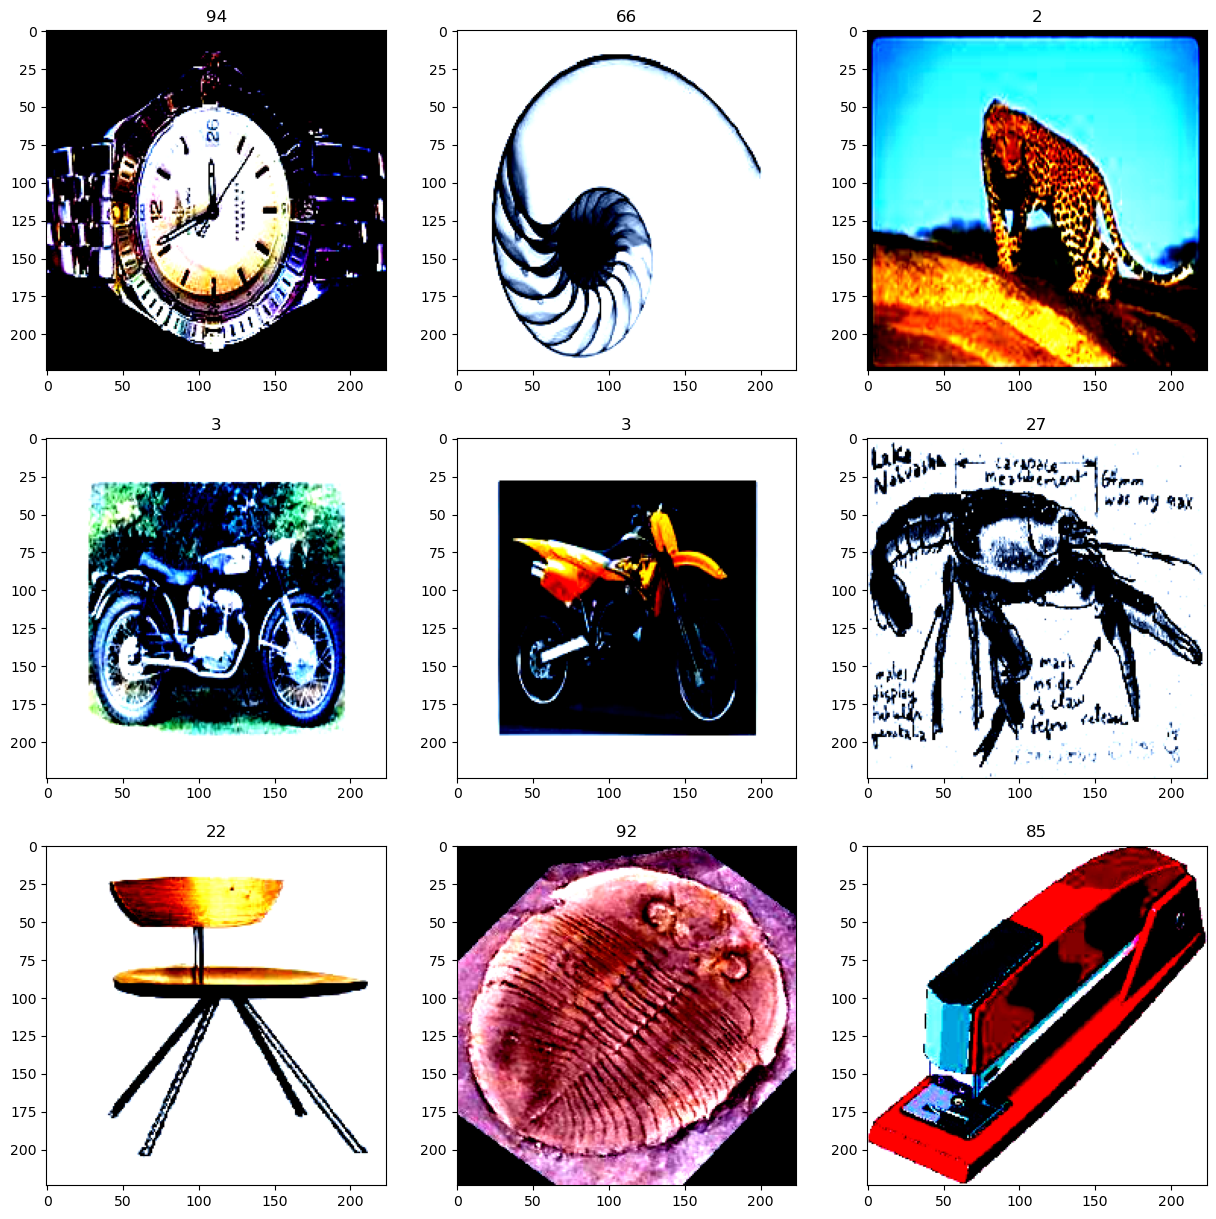

In [6]:
from matplotlib import pyplot as plt
f, axes = plt.subplots(3,3, figsize=(15,15))
mult = len(train_dataset)//9
for i, ax in enumerate(axes.flatten()):
    img = train_dataset[i*mult][0].permute(1,2,0)
    ax.imshow(img)
    ax.title.set_text(train_dataset[i*mult][1])